# Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.tree import DecisionTreeClassifier



In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Linear Regression model, one of the
simplest models there is. We will discuss two very different ways to train it


1.Using a direct “closed-form” equation that directly computes the model parame‐
ters that best fit the model to the training set

2. Using an iterative optimization approach, called Gradient Descent (GD), that
gradually tweaks the model parameters to minimize the cost function over the
training set, eventually converging to the same set of parameters as the first
method
Batch GD, Mini-batch GD,
and Stochastic GD.

# The Normal Equation


y = θ0+ θ1x1+ θ2x2+ ⋯ + θnxn

• θ is the value of θ that minimizes the cost function.
• y is the vector of target values containing y(1) to y(m)

In [5]:
import numpy as np
np.random.rand(10)  #uniform distributionover ``[0, 1)
np.random.randn(10)  #gussian distribution
 

array([ 1.23144633, -0.25492299, -0.70657283, -0.01139425,  0.51848707,
        2.02849558,  0.2974688 , -0.52234278, -0.40508607, -0.61808384])

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [10]:
X.shape  #2D array ==matrix

<class 'numpy.ndarray'>


(100, 1)

In [9]:
y.shape   #2D array ==matrix

(100, 1)

In [18]:
df = pd.DataFrame(X, columns=['x'])
df['y'] = y
df

,x,y
0,0.175891,4.244200
1,0.802592,5.893405
2,0.273343,4.269700
3,0.289003,4.788317
4,0.319933,3.861024
...,...,...
95,1.809698,9.061125
96,0.098617,4.953495
97,1.336331,10.112424
98,0.999630,6.721271


In [133]:
print(y[:4])   #2Darray -- matrix form
print(y.shape)
print(X[:4])   #2Darry-- matrix form
print(X.shape)


[[4.24419961]
 [5.89340458]
 [4.26970045]
 [4.78831742]]
(100, 1)
[[0.17589064]
 [0.80259161]
 [0.2733431 ]
 [0.2890028 ]]
(100, 1)


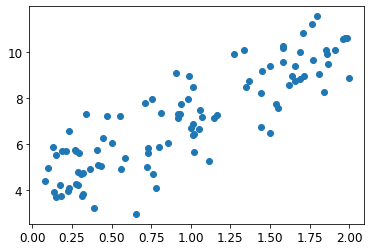

In [28]:
#realrtion

plt.scatter(X,y)
plt.show()

Randomly generated linear dataset

In [6]:
from numpy import linalg as la

### Normal equation

#Now let’s compute θ using the Normal Equation. 
θ = (XT X)−1 XT y


In [7]:
np.dot((np.dot((la.inv(np.dot(X.T,X))),X.T)),y)

array([[5.98929489]])

In [8]:
#BEFOR APPLYING THE EQUETION 
#WE HAVE TO ADD THE 1 TO ADJUST THE INTERCEPTS COFFICIENT IN X 

In [9]:
#generate ones
ones = np.ones((100,1))#2D columnvector --matrixform()

In [10]:
#add these ones in X
X_new = np.c_[ones, X]
#np.concatenate([ones, X], axis=1) optional

best_theta = np.dot((np.dot((la.inv(np.dot(X_new.T,X_new))),X_new.T)),y)
print(best_theta)
print(best_theta.shape)
print('intercept\n', best_theta[0])   #c
print('cofficent of x\n', best_theta[1])  #m   in y =mx + c

[[4.05580952]
 [2.96260327]]
(2, 1)
intercept
 [4.05580952]
cofficent of x
 [2.96260327]


We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.04 and θ1 = 3.11.
 Close
enough, but the noise made it impossible to recover the exact parameters of the origi‐
nal function.

X = 2 * np.random.rand(100, 1)


y = 4 + 3 * X + np.random.randn(100, 1)


Now you can make predictions using θ

prediction is: y = θT x


y = hθx = θ · x

In [ ]:
print(best_theta.shape)  #best theta matrix
x = X_new[0]    # X MATRIX
print(x.shape)      # x vector 1D array
x

In [228]:
print(best_theta.shape)  #best theta matrix
x = X_new[0]    # X MATRIX
print(x.shape)      # x vector 1D array
x

(2, 1)
(2,)


array([1.        , 0.17589064])

In [211]:
#pridection
y_pred = np.dot(best_theta.T, X_new[0])
y_pred

array([4.59797716])

In [223]:
y[0]  #actual y

array([4.24419961])

In [230]:
#lets try new point

nw = np.array([1,2])
nw.shape

array([1, 2])

In [231]:
y_pred = np.dot(best_theta.T, nw)
y_pred

array([10.28705513])

In [238]:
#lets take 2 points
nw = np.array([[1,0],[1,2]])
nw.shape


(2, 2)

In [237]:
y_pred = np.dot(best_theta.T, nw)
y_pred.shape

(1, 2)

In [253]:
X_new = np.array([[0], [2]])
o = np.ones((2,1))
Xb = np.c_[o,X_new]
print(Xb.shape)
print(best_theta.shape)
y_pd = Xb.dot(best_theta)
print(y_pd)

(2, 2)
(2, 1)
[[ 4.04940502]
 [10.28705513]]


In [254]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(best_theta)
y_predict

array([[ 4.04940502],
       [10.28705513]])

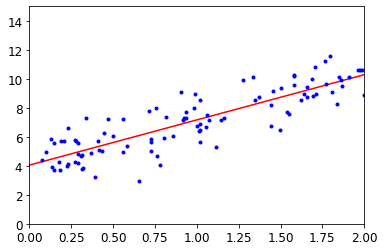

In [262]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [266]:
#from sklean
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

[4.04940502]
[[3.11882506]]


In [267]:
print(best_theta)

[[4.04940502]
 [3.11882506]]


### Singular Value Decomposition (SVD) 

The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:

In [270]:
 theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_new, y, rcond=1e-6)
>>> theta_best_svd

array([[4.04940502],
       [3.11882506]])

This function computes θ = X
+
y, where ᅚ
+
 is the pseudoinverse of X (specifically the
Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoin‐
verse directly:

In [271]:
#pinv is pseudoinverse
np.linalg.pinv(X_new).dot(y)


array([[4.04940502],
       [3.11882506]])

# Batch Gradient Descent

In [11]:
#add these ones in X
X_new = np.c_[ones, X]
#np.concatenate([ones, X], axis=1) optional

best_theta = np.dot((np.dot((la.inv(np.dot(X_new.T,X_new))),X_new.T)),y)

In [12]:
eta = 0.02
n_it = 2
m= 100   #no of instances in data set

theta = np.random.randn(2,1) #random initialization with m,c values
for i in range(n_it):
    grads = 2/m* np.dot(X_new.T, (np.dot(X_new, theta) - y))
    theta = theta - eta* grads
    

In [13]:
grads

array([[-10.80278399],
       [-11.81902999]])

In [299]:
theta

array([[0.55763173],
       [1.8910691 ]])

In [287]:
theta

array([[4.69066147],
       [2.48996127]])

In [277]:
np.random.randn(2,1)

array([[-0.30209919],
       [-0.66734156]])

In [303]:
X_new[1:2]

array([[1.        , 0.80259161]])

In [313]:
np.arange(20,5,2)

array([], dtype=int32)

In [318]:
y.shape

(100, 1)

In [319]:
(np.dot(X_new, theta) - y)y

SyntaxError: invalid syntax (Temp/ipykernel_12228/2369413804.py, line 1)

In [321]:
y.T

array([[ 4.24419961,  5.89340458,  4.26970045,  4.78831742,  3.86102412,
         4.08603143,  8.74366468,  5.76302236,  4.70612199,  5.54349357,
         6.0454515 ,  9.91519549,  4.74698981,  6.40099605, 10.8358942 ,
         6.89879535,  6.04969431, 10.62920601, 10.02034559,  2.97616905,
         4.10082834,  5.04771445,  7.1762215 ,  9.07588488, 10.60208996,
         5.74360514,  8.55640761, 10.27763142,  3.92996506,  6.65428946,
         7.49089803,  5.70223822, 11.20759414,  3.95911373,  9.55517815,
        10.10574065,  5.67624728,  8.50715877,  6.49817635,  4.41170885,
         9.41463067,  9.67630031, 11.55856733,  6.44313548,  8.96803465,
         9.49809477,  7.14806323,  5.60051973,  5.86636858,  8.85792355,
         7.24418377,  8.81313272,  7.31490828,  4.21648266,  7.26448978,
         5.00876176,  4.91668351, 10.10724974,  9.9193467 ,  3.69494829,
         5.26703153,  6.73900705,  5.8461406 ,  7.74228533,  7.30699866,
        10.58404562,  9.39083323,  7.21534307,  6.2

# Stochastic Gradient Descent


1. Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. 
2. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance
3.  this makes the algorithm much faster
since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each
iteration
4. stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on aver‐
age
5. Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down
6. When the cost function is very irregular , this can actually help the
algorithm jump out of local minima, 
7. so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does
8. Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate

In [33]:
n_epoch = 50
t0,t1 = 5,50
m =100 #no of instances
def learning_schedule(t):
    return t0/(t+t1)
#eta = learning_schedule(n_ep*m +i)


theta = np.random.randn(2,1) #random initialization with m,c values
for i in range(n_epoch):
    for j in range(m):
        random_indx = np.random.randint(m)
        xi = X_new[random_indx:random_indx+1]
        yi = y[random_indx:random_indx+1]
        grads = 2* np.dot(xi.T, (np.dot(xi, theta) - yi))
        eta = learning_schedule(n_ep*m +i)
        theta = theta - eta* grads
        

By convention we iterate by rounds of m iterations; each round is called an epoch. 
While the Batch Gradient Descent code iterated 1,000 times through the whole train‐
ing set, this code goes through the training set only 50 times and reaches a fairly good
solution:

In [34]:
theta

array([[3.83058595],
       [3.12587913]])

1. Note that since instances are picked randomly, some instances may be picked several
times per epoch while others may not be picked at all. 
2. If you want to be sure that the
algorithm goes through every instance at each epoch, another approach is to shuffle
the training set 
3. , then
go through it instance by instance, then shuffle it again, and so on. However, this gen‐
erally converges more slowly.

In [37]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, penalty=None)

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe
gressor class, which defaults to optimizing the squared error cost function. The fol‐
lowing code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops
by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1
(eta0=0.1), using the default learning schedule 

In [38]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.10548307]), array([3.0639919]))

# Mini-batch Gradient Descent

1. at each step, instead of computing the gradients based on the full train‐
ing set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches
2.  main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.
3.  Mini-batch GD will end up walking
around a bit closer to the minimum than SGD. But, on the other hand, it may be
harder for it to escape from local minima

4. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochas‐
tic GD and Mini-batch GD would also reach the minimum if you used a good learn‐
ing schedule.



In [63]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)  #fix the output of next code
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for i in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_new[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        t = t + 1     # t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        grads = 2/minibatch_size * np.dot(xi.T, (np.dot(xi, theta) - yi))
        #gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * grads

theta     

array([[4.15718928],
       [3.08182362]])

conclusion

There is almost no difference after training: all these algorithms
end up with very similar models and make predictions in exactly 
the same way.

# Polynomial Regression

1. if your data is actually more complex than a simple straight line? 
2. you can actually use a linear model to fit nonlinear data. 
3. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. 
4. This technique is called Polynomial Regression.

First, let’s generate some nonlinear data, based on a simple
quadratic equation9
 (plus some noise

In [64]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)#gaussian noise


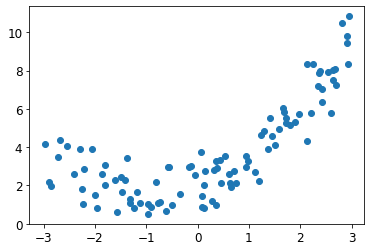

In [65]:
plt.scatter(X,y)

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features

In [66]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X)

In [86]:
X_poly

array([[ 2.38942838e+00,  5.70936800e+00],
       [ 1.66081999e+00,  2.75832305e+00],
       [-2.54112027e+00,  6.45729221e+00],
       [ 2.92037461e+00,  8.52858786e+00],
       [-1.37180422e+00,  1.88184681e+00],
       [-2.40850244e+00,  5.80088399e+00],
       [ 1.97588540e+00,  3.90412313e+00],
       [ 1.24005320e+00,  1.53773194e+00],
       [ 7.03312835e-01,  4.94648944e-01],
       [-2.06411482e+00,  4.26056998e+00],
       [-1.29023302e-01,  1.66470126e-02],
       [ 1.68333616e+00,  2.83362063e+00],
       [-1.17825637e+00,  1.38828808e+00],
       [-1.12986103e+00,  1.27658594e+00],
       [-2.98115456e+00,  8.88728253e+00],
       [-1.95453959e+00,  3.82022501e+00],
       [ 2.25243375e+00,  5.07345780e+00],
       [-3.49521050e-01,  1.22164965e-01],
       [ 2.90540700e+00,  8.44138981e+00],
       [-6.25752219e-01,  3.91565839e-01],
       [ 1.29111873e+00,  1.66698757e+00],
       [-1.30848574e+00,  1.71213494e+00],
       [-8.17142153e-01,  6.67721298e-01],
       [-1.

In [69]:
pf.get_feature_names()

['x0', 'x0^2']

In [87]:
df = pd.DataFrame(X_poly,  columns=pf.get_feature_names())
df['y'] =y
df.head()

,x0,x0^2,y
0,2.389428,5.709368,7.986265
1,1.660820,2.758323,6.038798
2,-2.541120,6.457292,4.059643
3,2.920375,8.528588,9.791914
4,-1.371804,1.881847,3.456455


In [91]:
#apply linear regression on it
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly, y)
lr.intercept_, lr.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

Not bad: the model estimates y = 0 . 56x12+ 0 . 93x1+ 1 . 78 when in fact the originalfunction was y = 0 . 5x12+ 1 . 0x1 + 2 . 0 + Gaussian noise.

In [95]:
np.linspace(-3, 3, 100)#Return evenly spaced numbers over a specified interval

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [100]:
X_test = np.linspace(-3, 3, 100).reshape(100,1)
X_test_poly = pf.transform(X_test)
y_pred = lr.predict(X_test_poly)

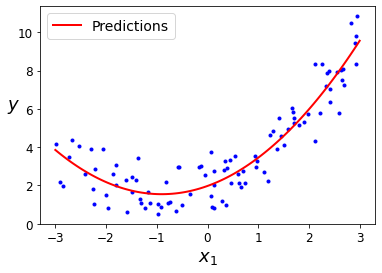

In [105]:
plt.plot(X, y, "b.")
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

1. when there are multiple features, Polynomial Regression is capable of find‐
ing relationships between features (which is something a plain Linear Regression
model cannot do). 
2. This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree. 
3. For example, if there were
two features a and b, PolynomialFeatures with degree=3 would not only add the
features a
2
, a
3
, b
2
, and b
3
, but also the combinations ab, a
2b, and ab2
.


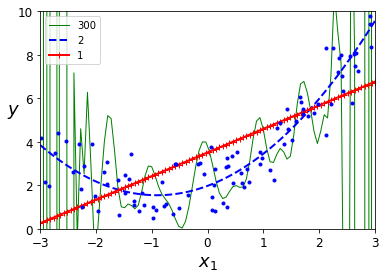

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_test)
    plt.plot(X_test, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

In [ ]:
 this high-degree Polynomial Regression model is severely overfitting the
training data, while the linear model is underfitting it. The model that will generalize
best in this case is the quadratic model. 

# Regularized Linear Models

In [ ]:
1. a good way to reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be
for it to overfit the data. 
2. For a linear model, regularization is typically achieved by constraining the weights of
the model.

### Ridge Regression

1. Ridge Regression (also called Tikhonov regularization) is a regularized version of Lin‐
ear Regression: a regularization term equal to α∑i = 1
n
θi
2
is added to the cost function. 
2. This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. 
3. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

4. α = 0
then Ridge Regression is just Linear Regression. 
5. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean.

# Logistic Regression

Decision Boundaries

 dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

In [38]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
width feature

In [42]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2) # 1 if Iris-Virginica, else 0

In [46]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [49]:
y = y.astype('int')

In [74]:
df = pd.DataFrame(X, columns= ['petal width'])
df['species'] = y
df.head()

,petal width,species
0,0.2,0
1,0.2,0
2,0.2,0
3,0.2,0
4,0.2,0


In [52]:
#logistic model 

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X,y)

LogisticRegression()

Let’s look at the model’s estimated probabilities for flowers with petal widths varying
from 0 to 3 cm

In [ ]:
#test the model

In [125]:
np.linspace(0, 10, 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [62]:
X_new = np.linspace(0, 3, 1000).reshape(1000, 1)  #same as reshape(-1,1)
#Return evenly spaced numbers over a specified interval.and reshapeit to 2D column vector
y_bproba = lg.predict_proba(X_new)
y_proba   #prob in neg ,positive class

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [118]:
dfx = pd.DataFrame(X_new, columns=['petal_width'])
dfx['prob'] = np.round(y_proba[:, 1],decimals=3)


dfx['species'] = lg.predict(X_new)# on test data
dfx.head()

,petal_width,prob,species
0,0.000000,0.001,0
1,0.003003,0.001,0
2,0.006006,0.001,0
3,0.009009,0.001,0
4,0.012012,0.001,0


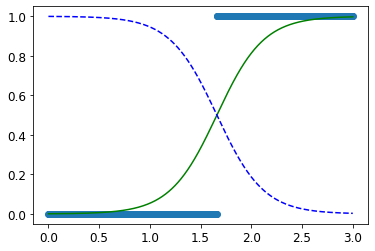

In [122]:
#plot
plt.scatter(x = 'petal_width', y ='species', data=dfx)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [138]:
y_prob = lg.predict_proba(X)  #on trainig data
df['+prob'] = y_prob[:,1]
df['-prob'] = y_prob[:,:1]
df['y_pred'] = lg.predict(X)

df.head()

,petal width,species,+prob,-prob,y_pred
0,0.2,0,0.001782,0.998218,0
1,0.2,0,0.001782,0.998218,0
2,0.2,0,0.001782,0.998218,0
3,0.2,0,0.001782,0.998218,0
4,0.2,0,0.001782,0.998218,0


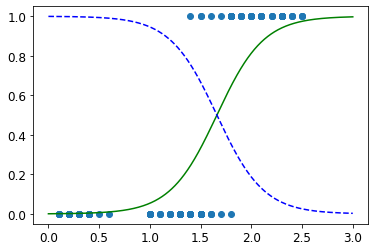

In [126]:
plt.scatter(x = 'petal width', y ='species', data=df)  #training set
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")   #test set
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

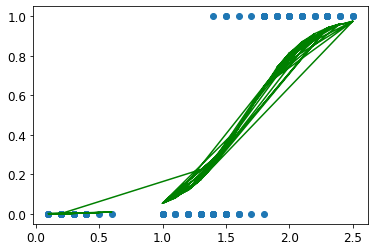

In [111]:
plt.scatter(x = 'petal width', y ='species', data=df)
plt.plot(X, y_prob[:, 1], "g-", label="Iris-Virginica")
#plt.plot(X, y_prob[:, 0], "b--", label="Not Iris-Virginica")

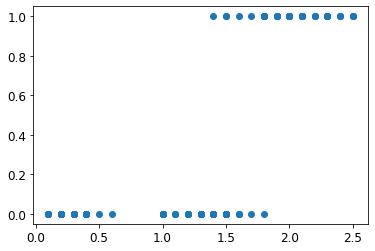

In [140]:
plt.scatter(x = 'petal width', y ='species', data=df)  #training set

1. Above about 2 cm the classifier is highly confident that the flower is an IrisVirginica (it outputs a high probability to that class), 
2. while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
class). 
3. In between these extremes, the classifier is unsure. 
4. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. 
5. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: 
6. if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an IrisVirginica, or else it will predict that it is not (even if it is not very confident

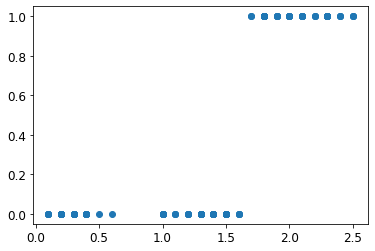

In [141]:
plt.scatter(x = 'petal width', y ='y_pred', data=df)  #training set

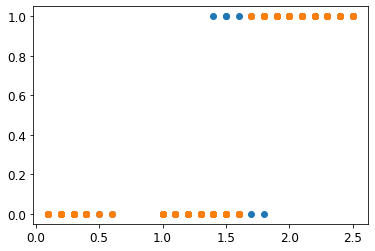

In [143]:
plt.scatter(x = 'petal width', y ='species', data=df)  #training set
plt.scatter(x = 'petal width', y ='y_pred', data=df)  #training set

there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%

In [147]:
lg.predict([[1.7], [1.5]])

array([1, 0])

In [158]:
df.species[df['petal width']== 1.5]

51     0
52     0
54     0
61     0
66     0
68     0
72     0
78     0
84     0
86     0
119    1
133    1
Name: species, dtype: int32

In [156]:
df.y_pred[df['petal width']== 1.5]

51     0
52     0
54     0
61     0
66     0
68     0
72     0
78     0
84     0
86     0
119    0
133    0
Name: y_pred, dtype: int32

In [131]:
df['petal width'].value_counts().sort_index()# 1 if Iris-Virginica, else 0

0.1     5
0.2    29
0.3     7
0.4     7
0.5     1
0.6     1
1.0     7
1.1     3
1.2     5
1.3    13
1.4     8
1.5    12
1.6     4
1.7     2
1.8    12
1.9     5
2.0     6
2.1     6
2.2     3
2.3     8
2.4     3
2.5     3
Name: petal width, dtype: int64

In [135]:
df.groupby('species')['petal width'].count()# 1 if Iris-Virginica, else 0

species
0    100
1     50
Name: petal width, dtype: int64

1. petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4
cm to 2.5 cm, 
2. while the other iris flowers (represented by squares) generally have a
smaller petal width, ranging from 0.1 cm to 1.8 cm.

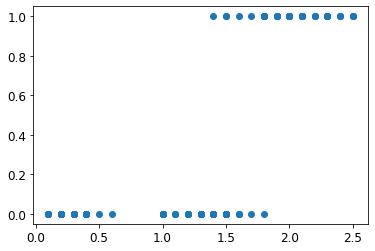

In [136]:
plt.scatter(x = 'petal width', y ='species', data=df)  #training set

The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less
the model is regularized.

# Softmax Regression

 Logistic Regression model can be generalized to support multiple classes directly,

In [159]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]


In [165]:
lg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
lg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

1. ScikitLearn’s LogisticRegression uses one-versus-all by default when you train it on more
than two classes, 
2. but you can set the multi_class hyperparameter to "multinomial"
to switch it to Softmax Regression instead. 
3. You must also specify a solver that sup‐
ports Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documenta‐
tion for more details). 
4. It also applies ℓ2
 regularization by default, which you can
control using the hyperparameter C.


In [166]:
lg.predict([[5, 2]])


array([2])

In [167]:
 lg.predict_proba([[5, 2]])


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])